In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

#os.chdir('C:\\Users\Matthew...')
path = os.getcwd()

df = pd.read_csv("hearing_test.csv") 

<AxesSubplot:xlabel='age', ylabel='physical_score'>

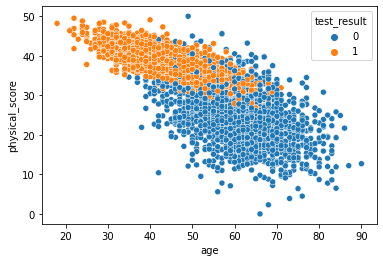

In [19]:
sns.scatterplot(x='age', y='physical_score', data=df, hue='test_result')

<AxesSubplot:xlabel='age', ylabel='physical_score'>

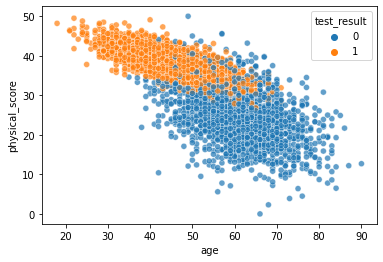

In [20]:
sns.scatterplot(x='age', y='physical_score', data=df, hue='test_result', alpha=0.7)

In [23]:
X = df.drop('test_result', axis=1)

In [24]:
y = df['test_result']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [26]:
scaler = StandardScaler()

In [27]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
knn_model = KNeighborsClassifier(n_neighbors=1)

In [30]:
knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [31]:
y_pred = knn_model.predict(scaled_X_test)

In [32]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [33]:
accuracy_score(y_test, y_pred)

0.8752

In [34]:
confusion_matrix(y_test,y_pred)

array([[416,  74],
       [ 82, 678]], dtype=int64)

In [35]:
#Show confusion matrix math
(420+383) / (470+430)

0.8922222222222222

In [36]:
1-accuracy_score(y_test, y_pred)
#we have ~10% error rate

0.12480000000000002

In [37]:
knn_model = KNeighborsClassifier(n_neighbors=1)
#This was the previous

In [38]:
knn_model = KNeighborsClassifier(n_neighbors=2)

In [39]:
knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [40]:
y_pred = knn_model.predict(scaled_X_test)

In [41]:
accuracy_score(y_test,y_pred)
#we see an improvement when moving from one neighbor to two

0.8584

In [42]:
confusion_matrix(y_test,y_pred)

array([[439,  51],
       [126, 634]], dtype=int64)

In [43]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(scaled_X_train,y_train)
y_pred = knn_model.predict(scaled_X_test)
accuracy_score(y_test,y_pred)
#goes up in accuracy again as we increase neighbors

0.9008

In [44]:
knn_model = KNeighborsClassifier(n_neighbors=4)
knn_model.fit(scaled_X_train,y_train)
y_pred = knn_model.predict(scaled_X_test)
accuracy_score(y_test,y_pred)
#goes up in accuracy again as we increase neighbors

0.892

In [45]:
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(scaled_X_train,y_train)
y_pred = knn_model.predict(scaled_X_test)
accuracy_score(y_test,y_pred)
#goes up in accuracy again as we increase neighbors

0.9048

In [46]:
#Elbow Method

In [47]:
test_error_rates = []
for k in range(1,50):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train)
    y_pred = knn_model.predict(scaled_X_test)
    test_error = 1 - accuracy_score(y_test,y_pred)
    test_error_rates.append(test_error)

Text(0.5, 0, 'K Value')

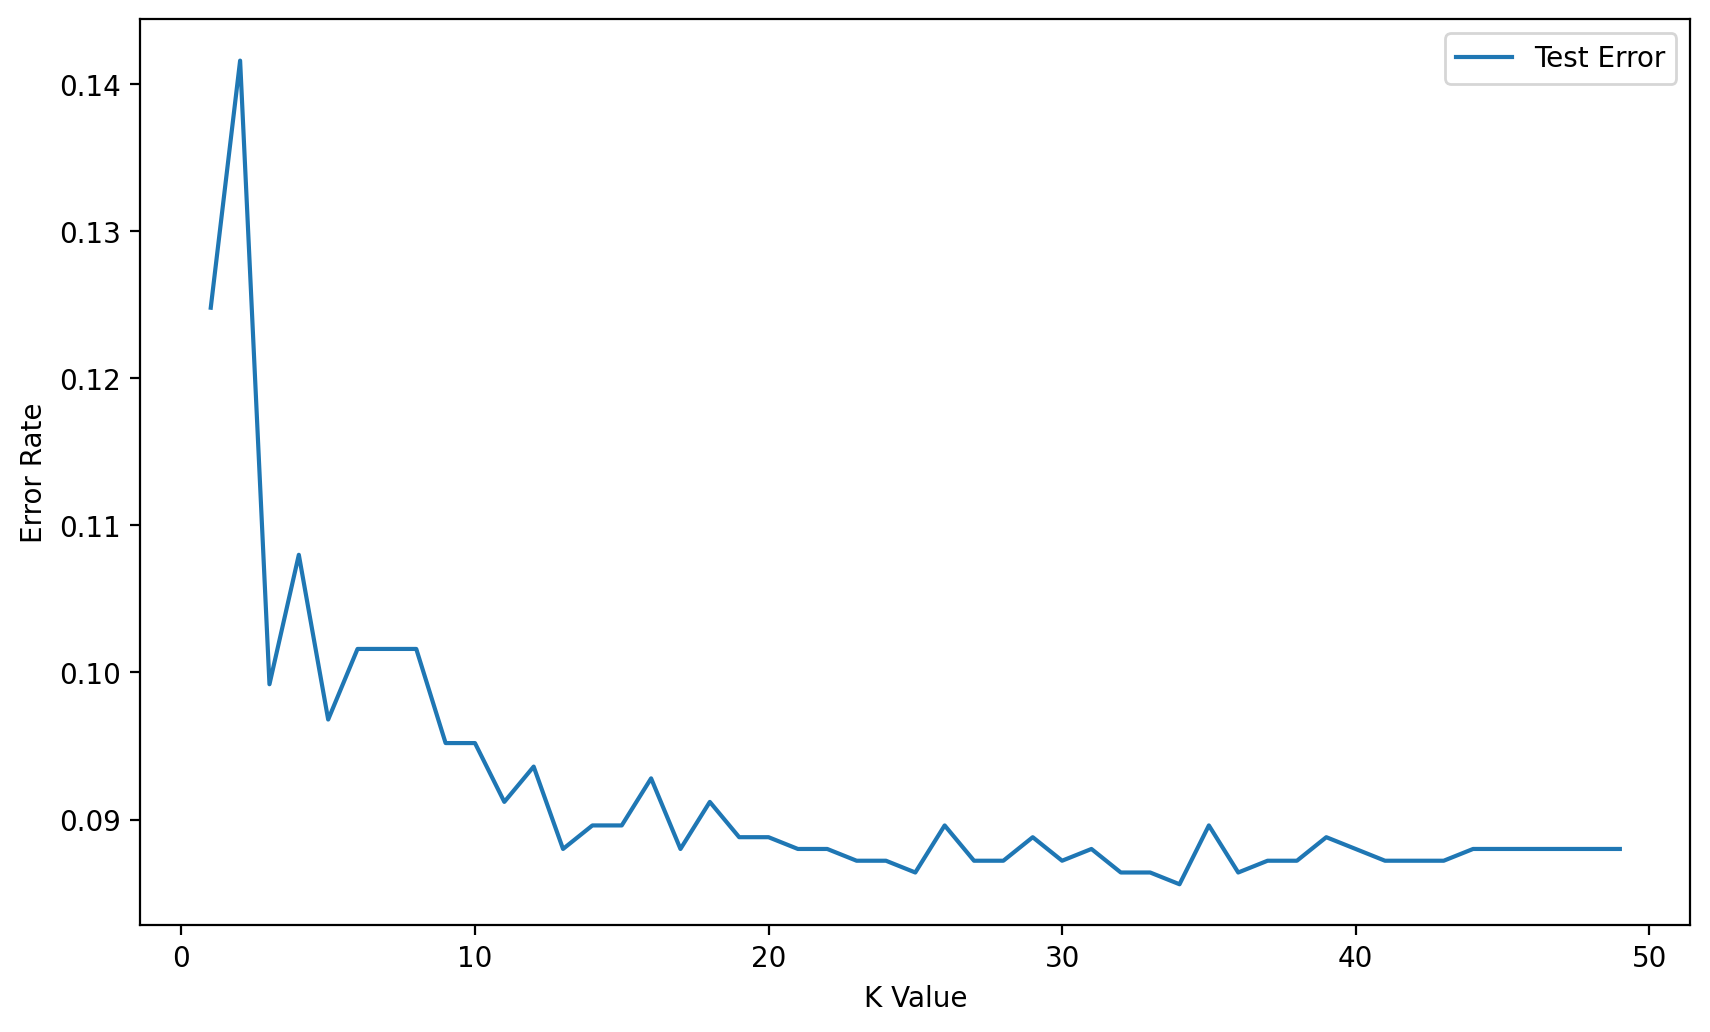

In [48]:
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,50),test_error_rates,label="Test Error")
plt.legend()
plt.ylabel("Error Rate")
plt.xlabel("K Value")